In [1]:
# Playing with some event data

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
import numpy as np
from dateutil import parser

In [3]:
def date_sequences(path):
    """
    Parse a file of date events, with groups of events delimited by '--' markers.
    Emit (start-date, event-date) pairs for each event in each group.
    """
    with open(path, 'r') as f:
        dates = []
        for line in f:
            line = line.strip()
            if line == '--':
                sd = sorted(dates)
                for d in sd:
                    yield (sd[0], d)
                dates = []
            else:
                d = parser.parse(line)
                dates.append(d)
        sd = sorted(dates)
        for d in sd:
            yield (sd[0], d)

date_points = [dp for dp in date_sequences('events.txt')]

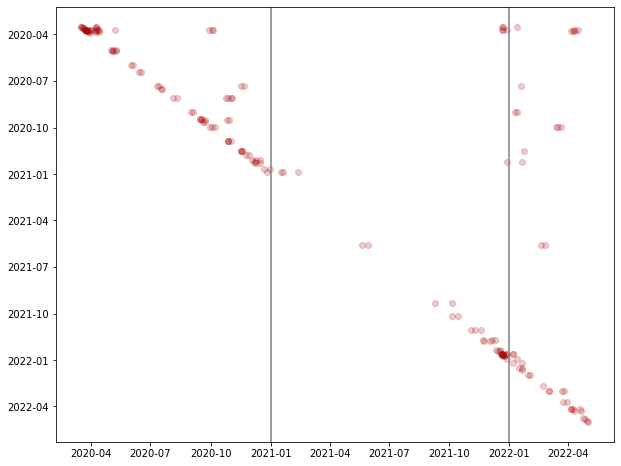

In [4]:
y = [dp[0] for dp in date_points]
x = [dp[1] for dp in date_points]
plt.scatter(x, y, color='#aa000033')

ax = plt.gca()
ax.invert_yaxis()
# divide the years
plt.axvline(x=parser.parse('01/01/2021'), color='gray')
plt.axvline(x=parser.parse('01/01/2022'), color='gray')
plt;